### Failing

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ipqa-research/ugropy/blob/main/docs/source/tutorial/ugropy_failing.ipynb)

`ugropy` may fail to obtain the subgroups of a molecule for a certain model for
two reasons: either there is a bug in the code, or the molecule cannot be
represented by the subgroups of the failing model.

`ugropy` utilizes SMARTS for the representation of functional groups to inquire
whether the molecule contains those structures. Let's examine the functional
group list for the classic liquid-vapor UNIFAC model.

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  %pip install ugropy

In [2]:
from ugropy import unifac

unifac.subgroups

smarts  molecular_weight
group                                                               
CH3                                        [CX4H3]          15.03500
CH2                                        [CX4H2]          14.02700
CH                                          [CX4H]          13.01900
C                                          [CX4H0]          12.01100
CH2=CH                                  [CH2]=[CH]          27.04600
...                                            ...               ...
NCO                        [NX2H0]=[CX2H0]=[OX1H0]          42.01700
(CH2)2SU                       [CH2]S(=O)(=O)[CH2]          92.11620
CH2CHSU                         [CH2]S(=O)(=O)[CH]          91.10840
IMIDAZOL                    [c]1:[c]:[n]:[c]:[n]:1          68.07820
BTI       C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F         279.91784

[113 rows x 2 columns]

For example, let's check the SMARTS representation of the alcohol group ACOH:

In [3]:
unifac.subgroups.loc["ACOH", "smarts"]

'[cH0][OH]'

The SMARTS representation it's telling us that the OH group it's, of course, a
hydroxyl group bounded by a single bound to an aromatic carbon atom.

An example of a molecule that cannot be represented by UNIFAC groups:

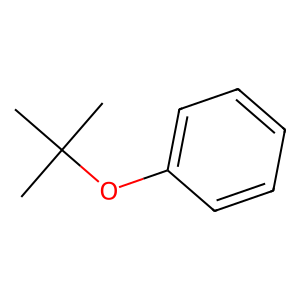

In [10]:
from rdkit.Chem import Draw


mol = unifac.get_groups("C1(=CC=CC=C1)OC(C)(C)C", "smiles")

Draw.MolToImage(mol.molecule)

In [11]:
print(mol.subgroups)

{}


The library "fails" to obtain any functional groups to accurately represent the
molecule. This failure is represented by an empty dictionary. In this case, the
"fail" is correct, but it could fail due to errors in the groups SMARTS
representations or the algorithm, resulting in an empty dictionary as well.
Currently, the supported models are tested against 444 different molecules.

If you encounter a failing representation, you can examine the structure of the
molecule and the list of functional groups of the failing model. If you
determine that the molecule can indeed be modeled, you may have discovered a
bug. Feel free to report the issue on the repository along with the failing
molecule's SMILES/name, the failing model and the `ugropy` version.

#### More than one solution
Models like UNIFAC or PSRK can have multiple solutions to represent a molecule,
and ugropy tries its best to find them all. In such cases, you will receive a
list of dictionaries, each containing one of the solutions found. Let's take a
look.

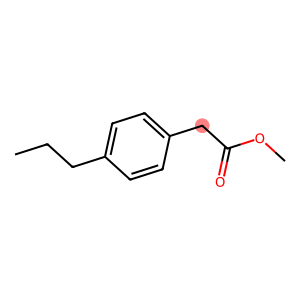

In [14]:
from ugropy import unifac
from rdkit.Chem import Draw


mol = unifac.get_groups("CCCC1=CC=C(CC(=O)OC)C=C1", "smiles", search_multiple_solutions=True)

Draw.MolToImage(mol[0].molecule, highlightAtoms=[7])

This molecule can be modeled in two ways depending on how we treat the CH2
attached to the ring and the ester carbon (highlighted in red). We can either
form an ACCH2 group and model the ester group with COO, or we can use an AC
group and model the ester group with CH2COO.

In [17]:
print("Solution 1:")
print(mol[0].subgroups)
print("solution 2:")
print(mol[1].subgroups)

Solution 1:
{'CH3': 2, 'CH2': 1, 'ACH': 4, 'ACCH2': 2, 'COO': 1}
solution 2:
{'CH3': 2, 'CH2': 1, 'ACH': 4, 'AC': 1, 'ACCH2': 1, 'CH2COO': 1}


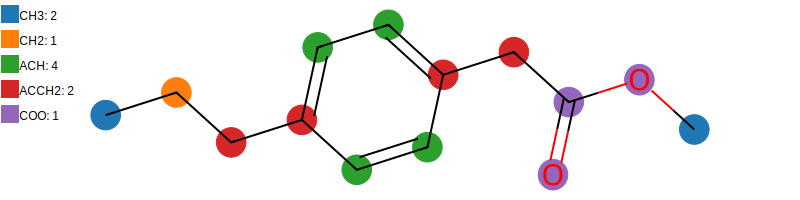

In [18]:
mol[0].draw(width=800)

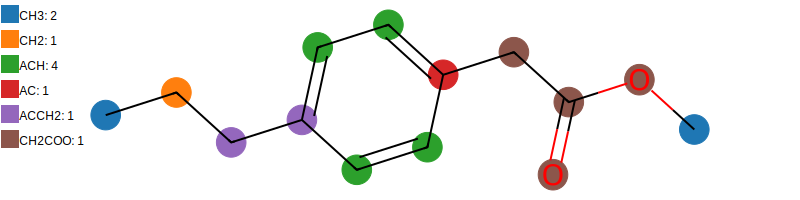

In [19]:
mol[1].draw(width=800)

This could be useful in cases where some groups have more interaction
parameters than others in the mixture that you want to model with UNIFAC.
Alternatively, you can try both approaches and compare if there are any
differences.